In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import math

In [63]:
#2a importing and reading the file "data_problem2"
df = pd.read_csv('data_problem2.csv')
df

,8.903628615644770150e+00,9.946774341125676600e+00,1.445839234341517709e+01,9.664572458033614311e+00,1.441226967850837859e+01,9.942011400948549849e+00,7.190086978986831134e+00,3.022935336064440648e+00,2.515429673643197361e+00,1.500518618061332177e+01,...,3.502196458308908245e+00,8.535172062019682926e+00,6.294537239926594197e+00,4.182269680089028441e+00,1.163467892764390044e+01,5.155506678014479149e+00,9.662742040752039685e+00,1.275189072343256136e+01,1.030799123448670507e+01,6.634982855672938662e+00
0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [65]:
#We see that the features are in the first column, so we save this features in another variable and the first column too
features= df.columns.astype(float).tolist()
classes=df.iloc[0].tolist()

#We separate the features depending on wich class they belong to
features_class_1 = [f for f, c in zip(features, classes) if c == 1.0]
features_class_0 = [f for f, c in zip(features, classes) if c == 0.0]

#We want to know how many samples are from each class
print(len(features_class_1))
print(len(features_class_0))

2000
1600


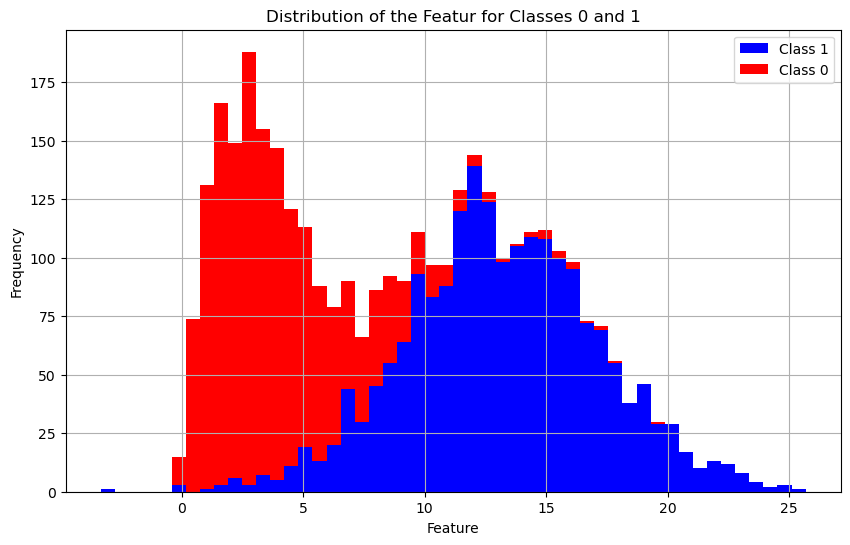

In [66]:
# Let's create the historgam
plt.figure(figsize=(10,6))
plt.hist([features_class_1, features_class_0], bins=50, stacked=True, color=['blue', 'red'], label=['Class 1', 'Class 0'])
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Distribution of the Featur for Classes 0 and 1')
plt.legend()
plt.grid(True)

plt.show()

In [68]:
#2c
#we convert 'features' and 'classes' 
features=np.array(features)
classes=np.array(classes)
np.random.seed(42)  

def stratified_split(features, classes, train_percentage=0.8):
    # to obtain indice for each class
    indices_C0 = np.where(classes == 0)[0]
    indices_C1 = np.where(classes == 1)[0]
    
    # number of samples for the training set 
    n_train_C0 = int(len(indices_C0) * 0.8)
    n_train_C1 = int(len(indices_C1) * 0.8)
    
    # shuffle indice randomly 
    np.random.shuffle(indices_C0)
    np.random.shuffle(indices_C1)
    
    # we choose the indices for the training
    train_indices_C0 = indices_C0[:n_train_C0]
    train_indices_C1 = indices_C1[:n_train_C1]
    
    # we create the training set for c0 and for c1
    X_train_C0 = features[train_indices_C0]
    y_train_C0 = classes[train_indices_C0]
    
    X_train_C1 = features[train_indices_C1]
    y_train_C1 = classes[train_indices_C1]

    # we choose the test indices
    test_indices_C0 = indices_C0[n_train_C0:]
    test_indices_C1 = indices_C1[n_train_C1:]

    # Now create the test set for C0 and C1
    X_test_C0 = features[test_indices_C0]
    y_test_C0 = classes[test_indices_C0]
    
    X_test_C1 = features[test_indices_C1]
    y_test_C1 = classes[test_indices_C1]

    return X_train_C0, y_train_C0, X_test_C0, y_test_C0, X_train_C1, y_train_C1, X_test_C1, y_test_C1

# Now we separate the data set using the function that we have created above 
(X_train_C0, y_train_C0, X_test_C0, y_test_C0, X_train_C1, y_train_C1, X_test_C1, y_test_C1) = stratified_split(features, classes)


#Let's estimate the parameters based on the training data
beta = 0

for i in range(len(X_train_C0)):
    beta = beta + X_train_C0[i]
beta = beta/(len(X_train_C0)*2) #alpha=2

#Now let's estimate first mu and after sigma2 because we need mu
mu = 0
sigma2 = 0
for i in range(len(X_train_C1)):
    mu = mu + X_train_C1[i]
mu = mu/len(X_train_C1)
for i in range(len(X_train_C1)):
    sigma2 = sigma2 + (X_train_C1[i]-mu)**2
sigma2 = sigma2/len(X_train_C1)

print(beta, mu, sigma2)



2.059723578175018 13.133777099934202 15.968362912514667


In [71]:
#Now we want to implement the Baye's classifier to the test set
# Combinar los conjuntos de prueba de ambas clases
X_test = np.concatenate((X_test_C0, X_test_C1))
y_test = np.concatenate((y_test_C0, y_test_C1))
#we will save our predictions in this array
pred = []
#prior class probability
PC0=len(X_train_C0)/(len(X_train_C0)+len(X_train_C1))
PC1=len(X_train_C1)/(len(X_train_C0)+len(X_train_C1))

#we apply Baye's classifier
for i in range(len(X_test)):
    PXC0=1/(beta**2)*X_test[i]*math.exp(-X_test[i]/beta)
    PXC1=1/math.sqrt(sigma2*2*math.pi)*math.exp(-1/2*(X_test[i]-mu)**2/sigma2)
    #decision rule
    if PC0*PXC0 > PC1*PXC1:
        pred.append(0)
    else:
        pred.append(1)

#accuracy
TP=0
TN=0 
FP=0 
FN=0
for i in range(len(X_test)):
    if y_test[i]== 1 and pred[i]==1:
        TP = TP + 1
    if y_test[i]== 0 and pred[i]== 0:
        TN = TN + 1
    if y_test[i]== 0  and pred[i]== 1:
        FP = FP + 1
    if y_test[i]== 1 and pred[i]== 0:
        FN = FN + 1

accuracy = (TP+TN)/(FP+FN+TP+TN)
print(beta, mu, sigma2, accuracy)

2.059723578175018 13.133777099934202 15.968362912514667 0.9041666666666667


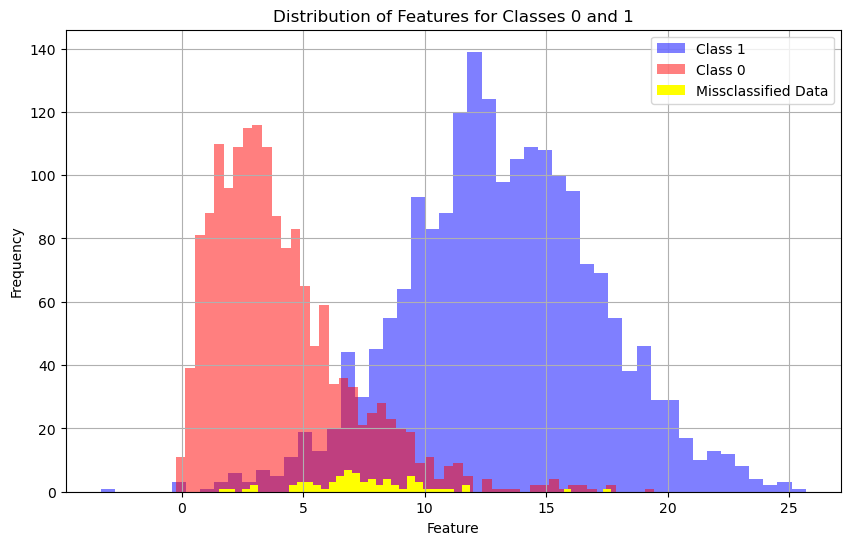

In [73]:
#2d
#we want to plot the missclassified samples
#we create a list for saving the missclassified samples 
missclassifiedClass=[]
missclassifiedFeatures = []
wellclassifiedClass = []
wellclassifiedFeatures = []

#we fill our list with the missclassified samples. Samples are not well classified if the predict class is different from the correct one
for i in range(len(X_test)):
    if y_test[i]== 0  and pred[i]== 1:
        missclassifiedClass.append(y_test[i])
        missclassifiedFeatures.append(X_test[i])
    if y_test[i]== 1 and pred[i]== 0:
        missclassifiedClass.append(y_test[i])
        missclassifiedFeatures.append(X_test[i])
    if y_test[i]== 0  and pred[i]== 0:
        wellclassifiedClass.append(y_test[i])
        wellclassifiedFeatures.append(X_test[i])
    if y_test[i]== 1 and pred[i]== 1:
        wellclassifiedClass.append(y_test[i])
        wellclassifiedFeatures.append(X_test[i])

plt.figure(figsize=(10, 6))

# To draw in the histogram the samples from class 1 
plt.hist(features_class_1, bins=50, color='blue', alpha=0.5, label='Class 1')

# To draw in the histogram the samples from class 0
plt.hist(features_class_0, bins=50, color='red', alpha=0.5, label='Class 0')

# To draw in the histogram the samples that has not been well classified
plt.hist(missclassifiedFeatures, bins=50, color='yellow', alpha=1, label='Missclassified Data')

plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Distribution of Features for Classes 0 and 1')
plt.legend()
plt.grid(True)  


plt.show()